# Desision Tree, KNN and K-Means ML Nodel implementation

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
df = pd.read_csv('iris.csv')

In [114]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [115]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

####  Our data is clean and free of impurity so we can move to model building step

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree


# 1.(a) Training set = 75%, Test set = 25%

In [117]:
# Splitting features and target
x1 = df.drop('species',axis=1).values
y1 = df.iloc[:,-1].values

# Splitting dataset into training and test sets
x_train1, x_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [118]:
x_train1.shape

(112, 4)

In [119]:
Y_train1.shape

(112,)

In [120]:
x_test1.shape

(38, 4)

In [121]:
Y_test1.shape

(38,)

## 1. Desision Tree Classifier

In [122]:
# Creating and training the Decision Tree
dtree1 = DecisionTreeClassifier()
dtree1.fit(x_train1, Y_train1)
dtree1.score(x_train1, Y_train1)


1.0

In [123]:
Y_test_pred_dtree1 = dtree1.predict(x_test1)
print(classification_report(Y_test_pred_dtree1, Y_test1))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [124]:
confusion_matrix(Y_test_pred_dtree1, Y_test1) # Confusion matrix


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [125]:
# Feature and class names
features = list(df.columns)
features.remove('species')
class_names = np.unique(y1)  

[Text(0.3076923076923077, 0.9285714285714286, 'petal_width <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal_length <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal_width <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal_width <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal_length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.

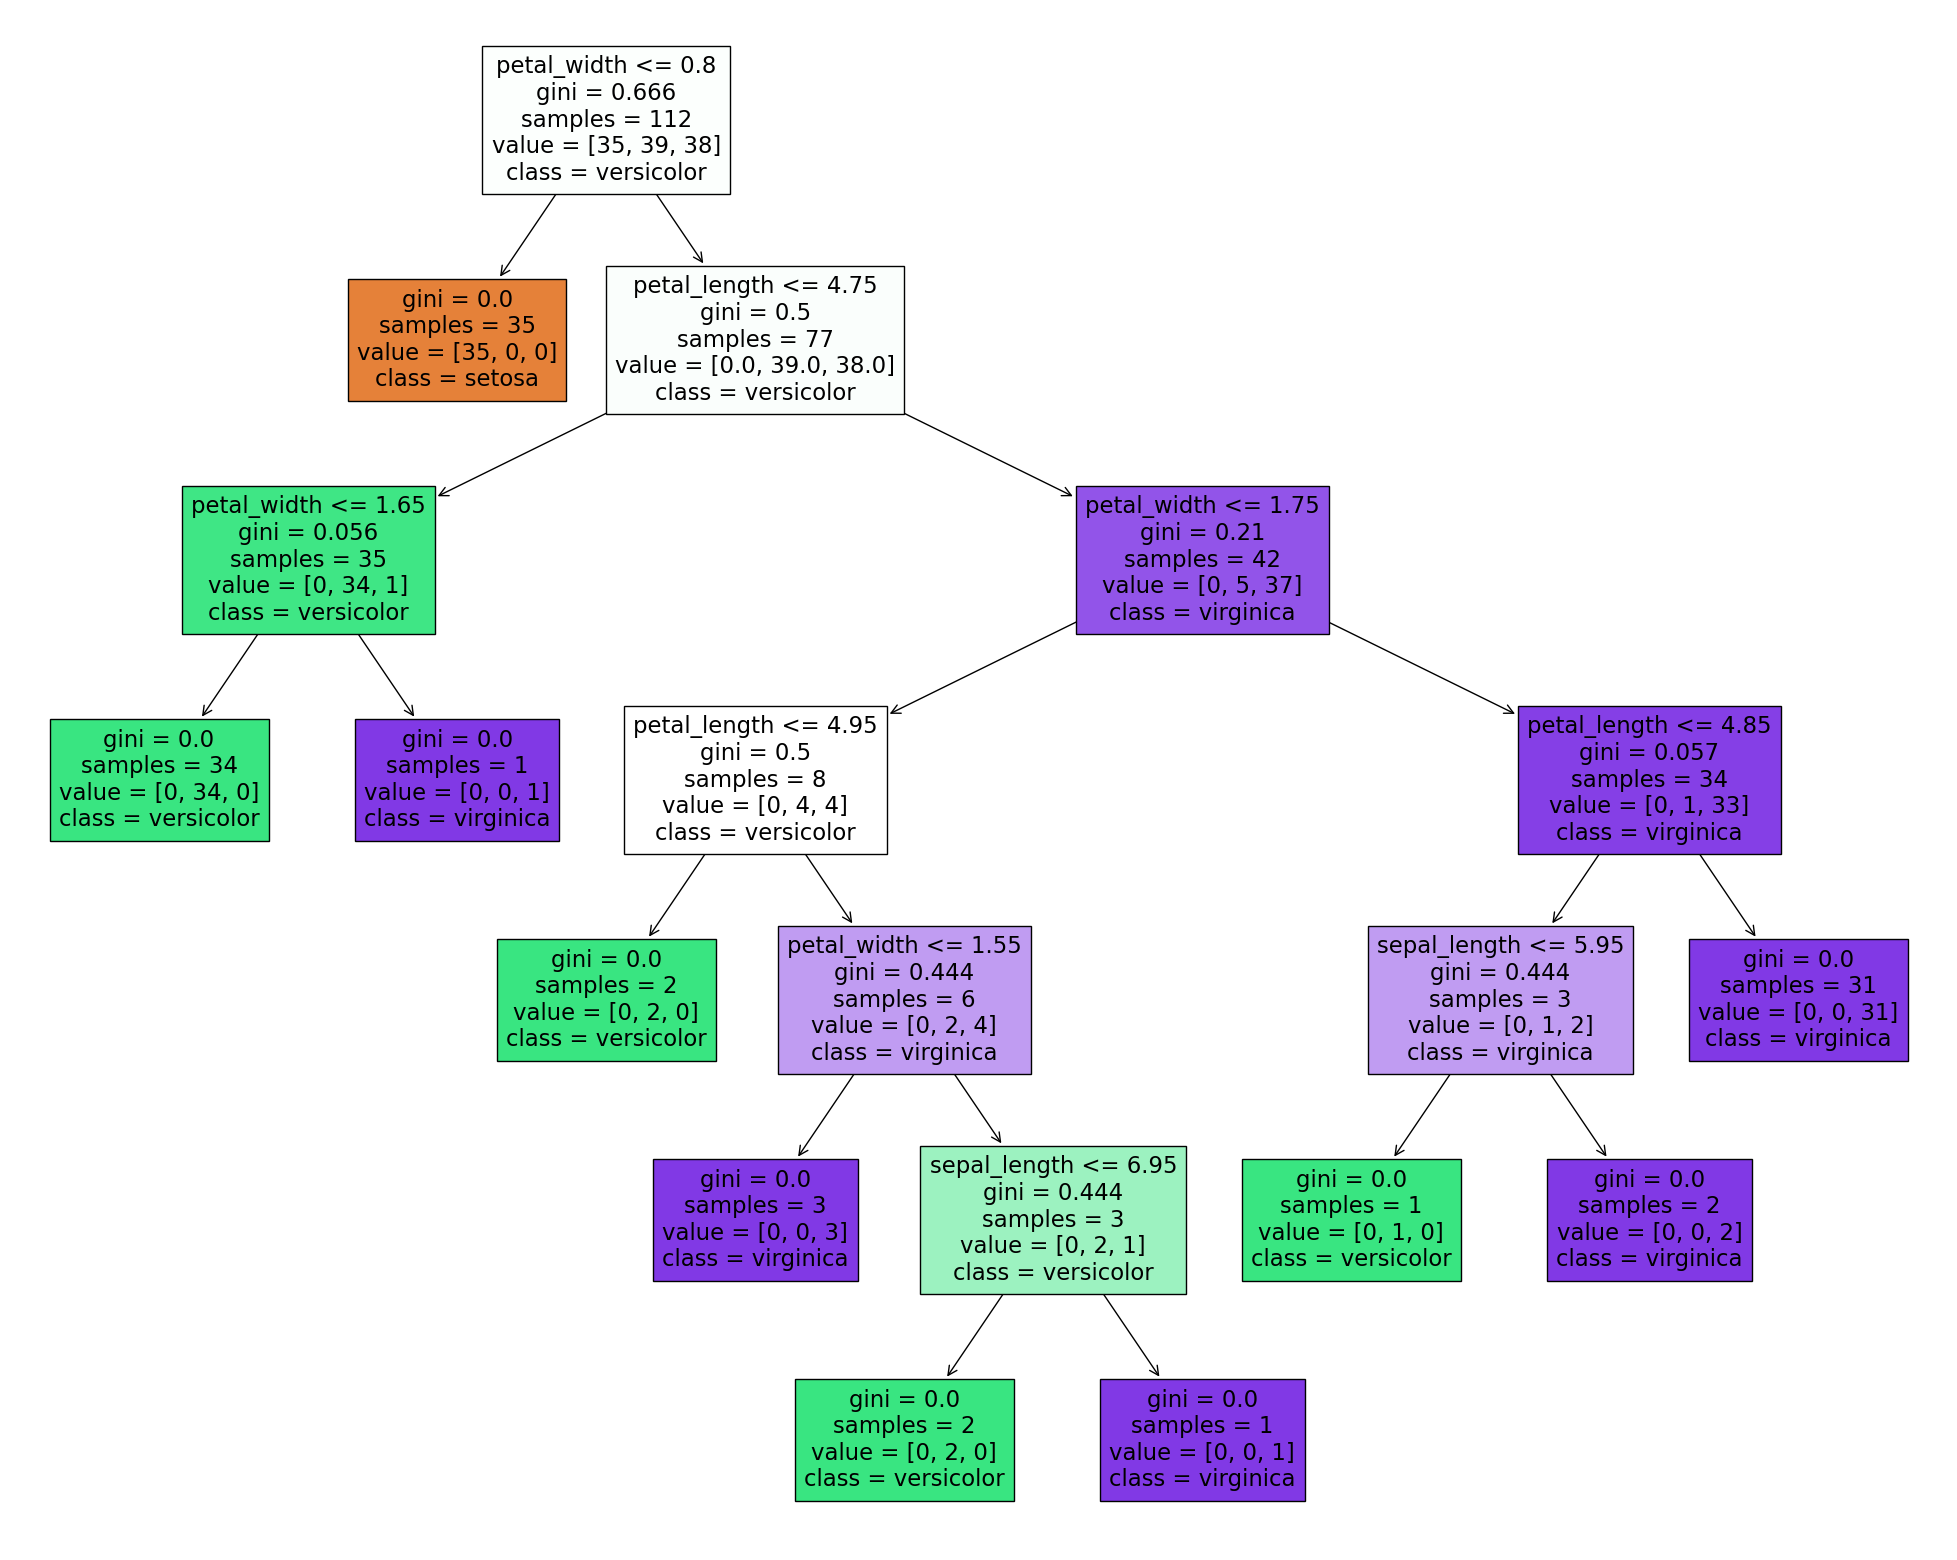

In [126]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree1,
                   feature_names=features,
                   class_names=class_names,
                   filled= True)

## 2. KNN Classifier

In [151]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [141]:
# Splitting features and target
x1 = df.drop('species',axis=1).values
y1 = df.iloc[:,-1].values

# Splitting dataset into training and test sets
x_train1, x_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [156]:
# Initialize and train the KNN model
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(x_train1, Y_train1)
knn1.score(x_train1, Y_train1)

0.9642857142857143

In [143]:
# Make predictions
Y_test_pred_knn1 = knn1.predict(x_test1)
print(classification_report(Y_test_pred_knn1, Y_test1))

accuracy = accuracy_score(Y_test1,Y_test_pred_knn1)
print(f"KNN Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

KNN Accuracy: 1.00


In [129]:
confusion_matrix(Y_test_pred_knn1, Y_test1)   #Plot confusion matrix

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

C:\Users\Amit Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


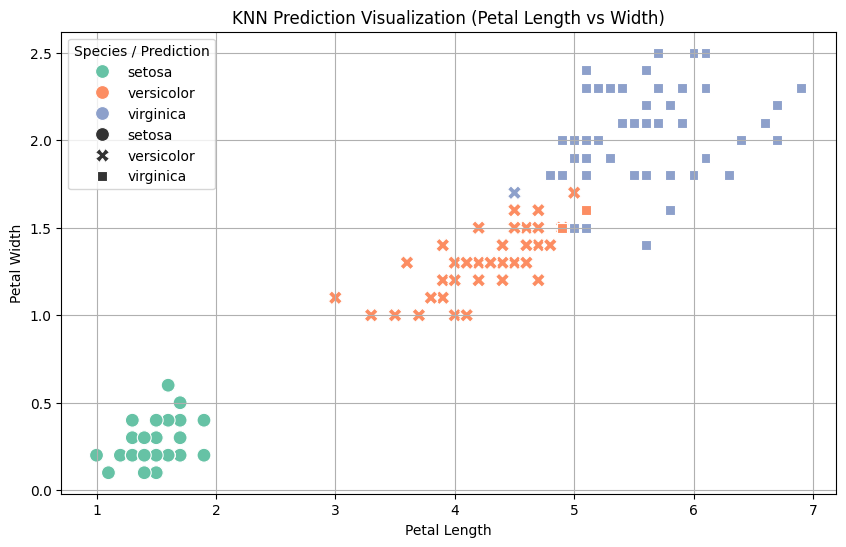

In [145]:
# Visualize with petal_length vs petal_width (only 2D plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['petal_length'], y=df['petal_width'], hue=y, style=knn1.predict(X), palette='Set2', s=100)
plt.title('KNN Prediction Visualization (Petal Length vs Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(True)
plt.legend(title='Species / Prediction')
plt.show()

In [147]:
# Identify the class labels (target classes) learned by the KNN model
print("Class Labels Learned by KNN Model:")
print(knn1.classes_)

Class Labels Learned by KNN Model:
['setosa' 'versicolor' 'virginica']


In [159]:
sample = [[6.7, 3.0, 5.2,2.3]]  # A sample similar to virginica
predicted_class = knn1.predict(sample)
print(f"Predicted class for sample {sample} is: {predicted_class[0]}")

Predicted class for sample [[6.7, 3.0, 5.2, 2.3]] is: virginica


#### Therefore Our class Label is virginica

# 3. K Means Implementation

In [131]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract features ('species' column)
X = df.drop('species', axis=1)

k = 3  # Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [132]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


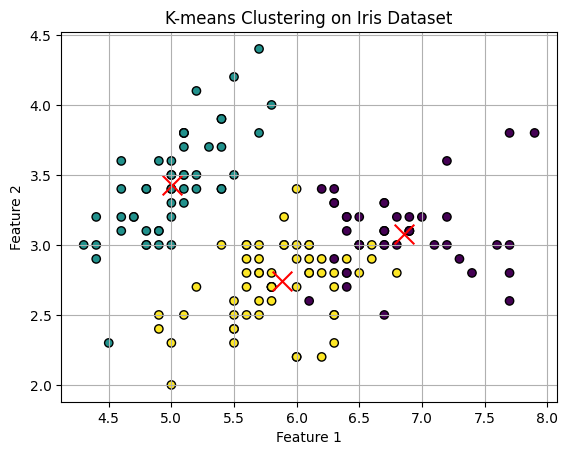

In [133]:
# Visualize the clusters using two features
plt.scatter(X["sepal_length"], X["sepal_width"], c =labels, cmap='viridis', marker='o',edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# 4. Naive Bayes Classifier on Iris Dataset

In [160]:
#Initialize and train Naive Bayes model
nb1 = GaussianNB()
nb1.fit(x_train1, Y_train1)
nb1.score(x_train1, Y_train1)

0.9464285714285714

In [161]:
Y_test_pred_nb1 = nb1.predict(x_test1)  # Make predictions
print(classification_report(Y_test_pred_nb1, Y_test1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [164]:
cm = confusion_matrix(Y_test_pred_nb1, Y_test1)


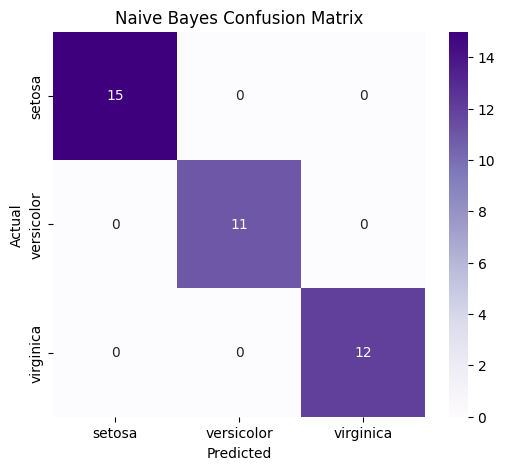

In [168]:

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d',
            xticklabels=nb1.classes_, yticklabels=nb1.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()